# Processing of X-ray images with Scikit-image library to improve the accuracy of detecting COVID-19. 

#### LAYAN ESSAM 

### Medical image analysis requires the completion of image preprocessing. It significantly affects the outcomes of covid detection. There is an abundance of variability in medical images; some have noise, and some have blurry contrast. In order to improve image quality and normalize image variability, image preprocessing is performed.

In [2]:
from skimage.io import imshow , imread
import matplotlib.pyplot as plt

## Noise Elimination

(<Axes: title={'center': 'Total Variation'}>,
 Text(0.5, 1.0, 'Total Variation'))

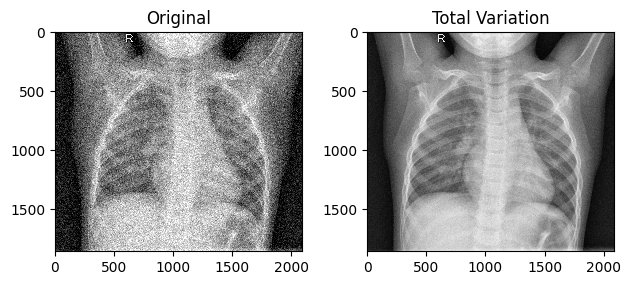

In [101]:
# Using total variation filter denoising
from skimage.restoration import denoise_tv_chambolle
chest_noisy = imread("chest_noise.png")
chest_denoised_tv = denoise_tv_chambolle(chest_noisy)

plt.subplot(121),imshow(chest_noisy) , plt.title("Original") 
plt.subplot(122),imshow(chest_denoised_tv) , plt.title("Total Variation")

(<Axes: title={'center': 'bilateral'}>,
 Text(0.5, 1.0, 'bilateral'))

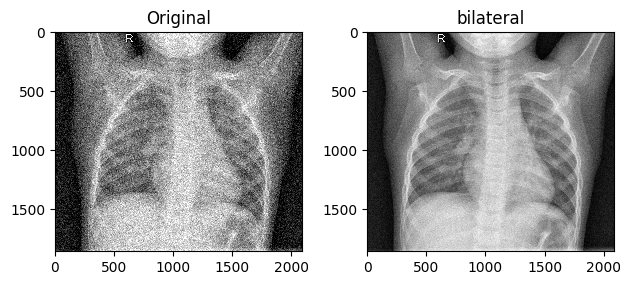

In [105]:
from skimage.restoration import denoise_bilateral
chest_denoised_bi = denoise_bilateral(chest_noisy)

plt.subplot(121),imshow(chest_noisy) , plt.title("Original") 
plt.subplot(122),imshow(chest_denoised_bi) , plt.title("bilateral")

## Filtering 

(<Axes: title={'center': 'Median Filter CXR'}>,
 Text(0.5, 1.0, 'Median Filter CXR'))

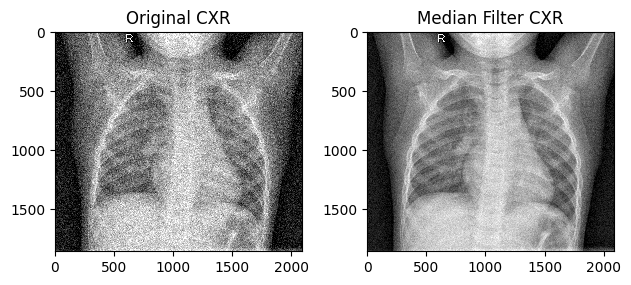

In [3]:
# Median Filter 
from skimage.filters import median
chest = imread("chest_noise.png")
chest_median = median(chest)

plt.subplot(121), imshow(chest), plt.title("Original CXR") 
plt.subplot(122), imshow(chest_median), plt.title("Median Filter CXR") 

(<Axes: title={'center': 'Gaussian Filter CXR'}>,
 Text(0.5, 1.0, 'Gaussian Filter CXR'))

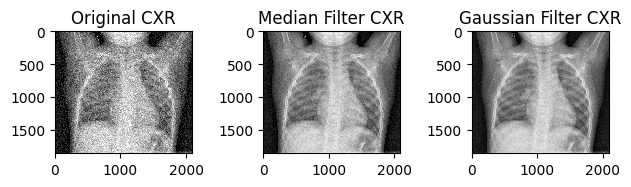

In [4]:
# Gaussian Filter 
from skimage.filters import gaussian
chest = imread("chest_noise.png")
chest_gaussian = gaussian(chest)

plt.subplot(131), imshow(chest), plt.title("Original CXR") 
plt.subplot(132), imshow(chest_median), plt.title("Median Filter CXR") 
plt.subplot(133), imshow(chest_gaussian), plt.title("Gaussian Filter CXR") 

#### It may be difficult to discern the difference between the two filters, but it may become more evident if the contrast of the image is enhanced using techniques such as adaptive histogram equalization.

## Edge detection

#### We are going to use the Scipy library due to its greater ability to detect x-ray edges

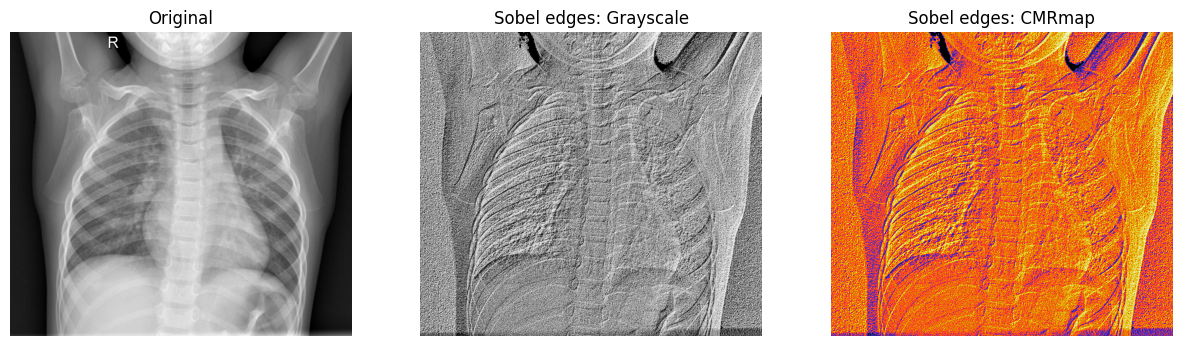

In [46]:
from scipy import ndimage
import numpy as np
chest = imread("chest.jpeg",as_gray= True)
# A Sobel filter must be applied to the original image separately on its x- and y-axes.
x_sb = ndimage.sobel(chest, axis=0)
y_sb = ndimage.sobel(chest, axis=1)
# se np.hypot() to calculate euclidean distance of sobel_x and sobel_y
# taking magnitude
sobel_img = np.hypot(x_sb, y_sb)
# Normalization
sobel_img *= 255.0 / np.max(sobel_img)
#For better compatibility with Matplotlib, we must convert the float16 image to float32 format.
sobel_img = sobel_img.astype("float32")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))

axes[0].set_title("Original")
axes[0].imshow(chest, cmap="gray")
axes[1].set_title("Sobel edges: Grayscale")
axes[1].imshow(sobel_img, cmap="gray")
axes[2].set_title("Sobel edges: CMRmap")
axes[2].imshow(sobel_img, cmap="CMRmap")
for i in axes:
    i.axis("off")
plt.show()

### Using skimage for edge detections 

(<Axes: >,
 Text(0.5, 1.0, 'edges'))

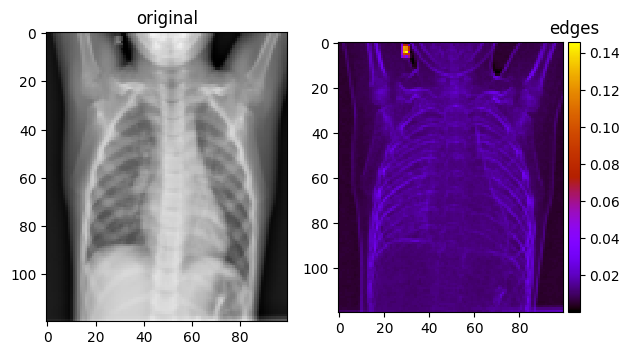

In [68]:
from skimage.filters import sobel
from skimage.transform import resize 

edge_sobel = sobel(chest)
plt.subplot(121),imshow(resize(chest,(120,100))) , plt.title("original") 
plt.subplot(122),imshow(resize(edge_sobel,(120,100)), cmap= 'gnuplot') , plt.title("edges") 

## Contrast Enhancement 

### Histogram equalization

(<Axes: title={'center': 'histogram equalization'}>,
 Text(0.5, 1.0, 'histogram equalization'))

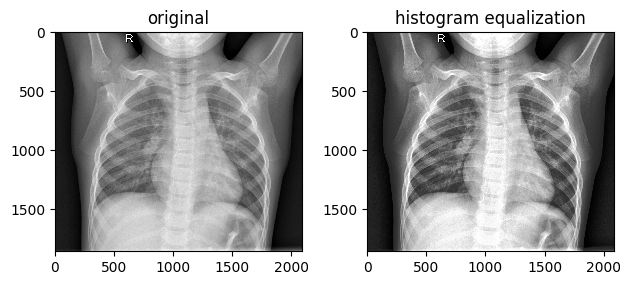

In [82]:
from skimage import exposure 
chest_eq = exposure.equalize_hist(chest)

plt.subplot(121),imshow(chest) , plt.title("original") 
plt.subplot(122),imshow(chest_eq) , plt.title("histogram equalization") 

### Adaptive Histogram Equalization

(<Axes: title={'center': 'adaptive equalized'}>,
 Text(0.5, 1.0, 'adaptive equalized'))

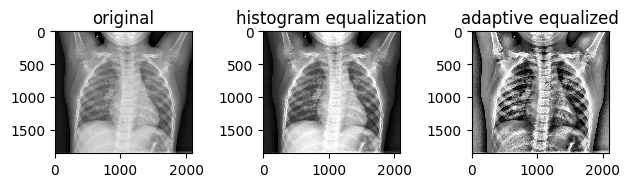

In [84]:
chest_adapted= exposure.equalize_adapthist(chest,clip_limit = 0.03)


plt.subplot(131),imshow(chest) , plt.title("original") 
plt.subplot(132),imshow(chest_eq) , plt.title("histogram equalization") 
plt.subplot(133),imshow(chest_adapted) , plt.title("adaptive equalized") 

#### Based on the images, it can be concluded that the Adaptive Histogram Equalization produces a more accurate image. While the Standard Histogram Equalization produces a sharper image than the original, the Adaptive Histogram Equalization makes the location and intensity of the infection in the lungs more apparent. It is possible to see even the smallest details, such as veins, using this method.

Text(0, 0.5, 'Number of Pixels')

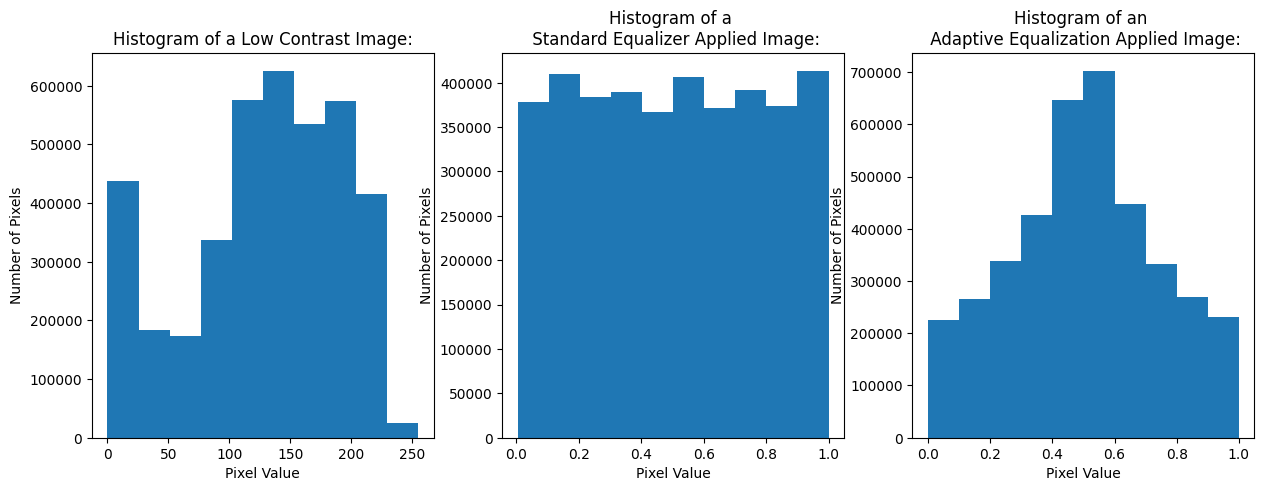

In [99]:
fig = plt.figure(figsize=(15,5))

plt.subplot(131),
plt.hist(chest.ravel()),
plt.title('Histogram of a Low Contrast Image:'),
plt.xlabel('Pixel Value'),
plt.ylabel('Number of Pixels')

plt.subplot(132),
plt.hist(chest_eq.ravel()),
plt.title('Histogram of a \n Standard Equalizer Applied Image:'),
plt.xlabel('Pixel Value'),
plt.ylabel('Number of Pixels')


plt.subplot(133),
plt.hist(chest_adapted.ravel()),
plt.title('Histogram of an \n Adaptive Equalization Applied Image:'),
plt.xlabel('Pixel Value'),
plt.ylabel('Number of Pixels')

#### The image with Sandrad Equalization applied shows a more uniformly spread out histogram.

## Altering Image Brightness

(<Axes: title={'center': 'Dark'}>,
 Text(0.5, 1.0, 'Dark'))

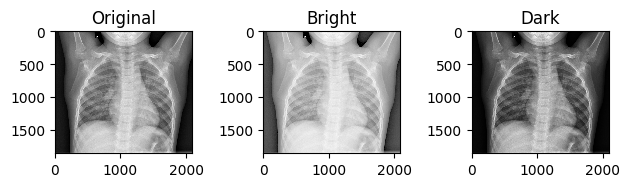

In [107]:
from skimage import exposure 
chest_bright = exposure.adjust_gamma(chest,gamma = 0.5)
chest_dark = exposure.adjust_gamma(chest,gamma = 1.5)

plt.subplot(131), imshow(chest), plt.title("Original") 
plt.subplot(132), imshow(chest_bright), plt.title("Bright") 
plt.subplot(133), imshow(chest_dark), plt.title("Dark") 